## CMPINF - 2100 - Final Project - Clustering

In this section we will perform K-means clustering and hierarchal clustering analysis.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read data

In [2]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [3]:
df =  pd.read_csv( songs_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## Pre-Processs

In [4]:
df_copy = df.copy()

In [5]:
df[df['speechiness'] == 0]

track_id             track_name      track_artist  \
11363  51w6nRCU68klqNfYaaVP2j  Hi, How're You Doin'?  DREAMS COME TRUE   

       track_popularity          track_album_id  track_album_name  \
11363                 0  4wdK52JVu5GzhxW3RCZ3AV  Dreams Come True   

      track_album_release_date          playlist_name             playlist_id  \
11363               1989-03-21  City Pop 1985 シティーポップ  3j2osvmecEao5nmo9jZ5df   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
11363           rock  ...   1   -26.087     1          0.0           0.0   

       instrumentalness  liveness  valence  tempo  duration_ms  
11363               0.0       0.0      0.0    0.0         4000  

[1 rows x 23 columns]

There appears to be a row where most of the numerical values is equal to 0. This row will be dropped as the song is real however the data is wrong. Additionally, leaving this row would cause the log tranformation to be equal to infinity which will cause errors later on.

In [6]:
df_copy.drop(df_copy[df_copy['speechiness'] == 0].index, inplace=True)
df_copy

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity          track_album_id  \
0                    66  2oCs0DGTsRO98Gh5ZSl2Cx   
1                    67  63rPSO264uRjW1X5E6cWv6   
2                    70  1HoSmj2eLcsrR0vE9gThr4   
3                    60  1nqYsOef1yKKuGOVchbsk6   
4                    69  7m7vv9wlQ4i0LFuJiE2zsQ   
...                 ...                     ...   
32828                42  2azRoBBWEEEYhqV6sb7JrT   
32829                20  6kD6KLxj7s8eCE3ABvAyf5   
32830                14  0ltWNSY9JgxoIZO4VzuCa6   
32831                15  1fGrOkHnHJcStl14zNx8Jy   
32832                27  0X3mUOm6MhxR7PzxG95rAo   

                                        track_album_name  \
0      I Don't Care (with Justin Bieber) [Loud Luxury...   
1                        Memories (Dillon Francis Remix)   
2                        All the Time (Don Diablo Remix)   
3                            Call You Mine - The Remixes   
4                Someone You Loved (Future Humans Remix)   
...                                                  ...   
32828                         City Of Lights (Vocal Mix)   
32829                                     Closer Remixed   
32830                       Sweet Surrender (Radio Edit)   
32831                             Only For You (Remixes)   
32832                                      Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
0                   2019-06-14        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
1                   2019-12-13        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
2                   2019-07-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
3                   2019-07-19        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
4                   2019-03-05        Pop Remix  37i9dQZF1DXcZDD7cfEKhW   
...                        ...              ...                     ...   
32828               2014-04-28  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32829               2013-03-08  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32830               2014-04-21  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre  ... key  loudness  mode  speechiness  acousticness  \
0                pop  ...   6    -2.634     1       0.0583      0.102000   
1                pop  ...  11    -4.969     1       0.0373      0.072400   
2                pop  ...   1    -3.432     0       0.0742      0.079400   
3                pop  ...   7    -3.778     1       0.1020      0.028700   
4                pop  ...   1    -4.672     1       0.0359      0.080300

In [7]:
df_copy['energy'] = np.power(df_copy.energy, 2)
df_copy['acousticness'] = np.power(df_copy.acousticness, 1/4) 
df_copy['liveness'] = np.log(df_copy.liveness) 
df_copy['speechiness'] = np.log(df_copy.speechiness) 

In [8]:
df_inputs = df_copy.groupby(['track_id'], dropna=False).\
aggregate(playlist_genre = ('playlist_genre', 'first'),
          danceability = ('danceability', 'mean'),
          energy = ('energy', 'mean'),
          key = ('key', 'first'),
          mode = ('mode', 'first'),
          acousticness = ('acousticness', 'mean'),
          liveness= ('liveness', 'mean'),
          valence = ('valence', 'mean'),
          duration_ms = ('duration_ms', 'mean')).\
reset_index()


df_inputs['mode'] = df_inputs['mode'].astype('category')
df_inputs['key'] = df_inputs['key'].astype('category')

df_num = df_inputs.select_dtypes(include=['number'])
df_categorical = df_inputs.select_dtypes(include=['object', 'category'])
df_num.head()

danceability    energy  acousticness  liveness  valence  duration_ms
0         0.682  0.160801      0.726777 -2.422495    0.566     235440.0
1         0.582  0.495616      0.505121 -1.551169    0.698     197286.0
2         0.303  0.774400      0.328887 -1.058430    0.404     373512.0
3         0.659  0.630436      0.166091 -1.133204    0.852     228565.0
4         0.662  0.702244      0.581067 -2.429283    0.496     236308.0

In [9]:
id_cols = ['rowid'] + df_categorical.columns.to_list()
id_cols

['rowid', 'track_id', 'playlist_genre', 'key', 'mode']

In [10]:
songs_lf = df_inputs.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=id_cols, value_vars=df_num.columns) 

songs_lf

rowid                track_id playlist_genre key mode      variable  \
0           0  0017A6SJgTbfQVU2EtsPNo           rock   2    1  danceability   
1           1  002xjHwzEx66OWFV2IP9dk            r&b   5    1  danceability   
2           2  004s3t0ONYlzxII9PLgU6z           rock   9    1  danceability   
3           3  008MceT31RotUANsKuzy3L            pop  10    0  danceability   
4           4  008rk8F6ZxspZT4bUlkIQG            pop   1    1  danceability   
...       ...                     ...            ...  ..  ...           ...   
170125  28350  7zxRMhXxJMQCeDDg0rKAVo            r&b   0    1   duration_ms   
170126  28351  7zyLObYw4QUKQDyZOb4J0Y            r&b   1    0   duration_ms   
170127  28352  7zycSpvjDcqh6YT1FEl2kY            pop   2    1   duration_ms   
170128  28353  7zye9v6B785eFWEFYs13C2            r&b   5    0   duration_ms   
170129  28354  7zzZmpw8L66ZPjH1M6qmOs           rock   2    1   duration_ms   

             value  
0            0.682  
1            0.582  
2            0.303  
3            0.659  
4            0.662  
...            ...  
170125  179773.000  
170126  223890.000  
170127  260240.000  
170128  191205.000  
170129  267960.000  

[170130 rows x 7 columns]

In [11]:
popularity_threshold = df_copy.track_popularity.median()
df_copy['popularity_label'] = np.where(df_copy['track_popularity'] >= popularity_threshold, 1, 0)

### Standardizing

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


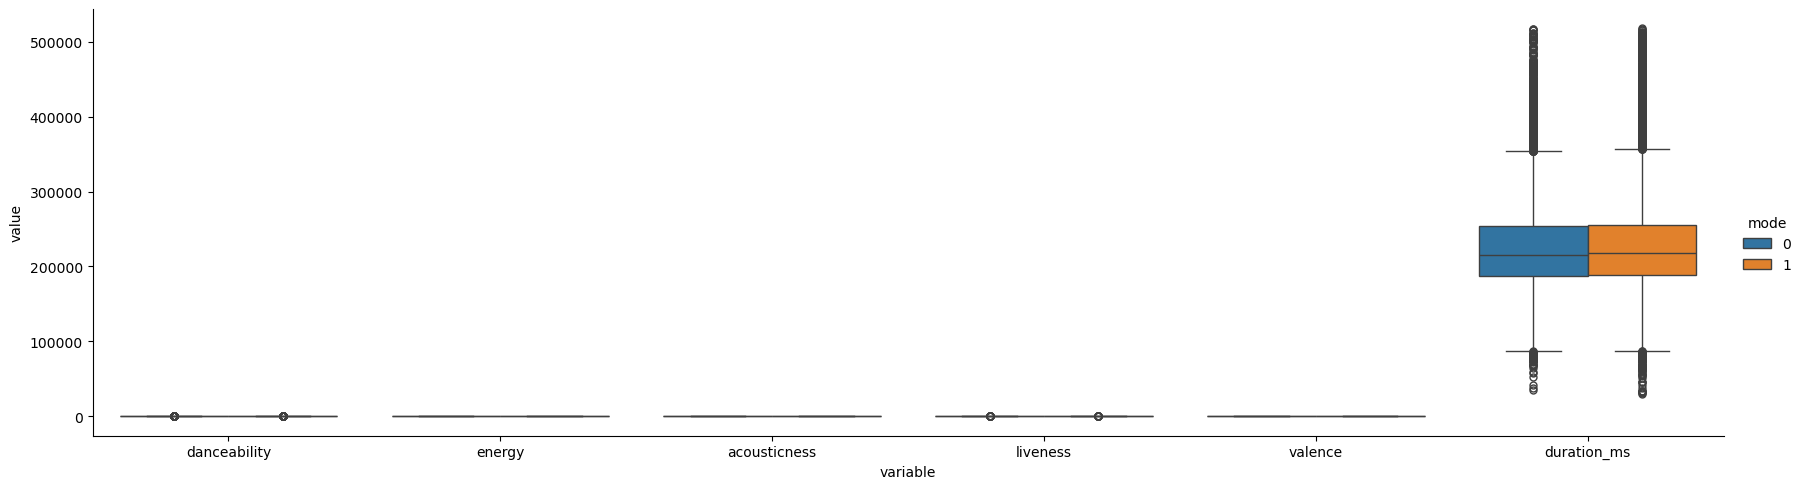

In [12]:
sns.catplot(data = songs_lf, x='variable', y='value', hue = 'mode', kind='box', aspect=3.5)

plt.show()

There is one variable that is much larger in magnitude and scale thus we shall standardize the data using the `StandardScaler()` feature.

Note: there was 1 row where `NaN` values occured when tranforming the values. This was found while attempting k-means and could be do to an error in the numbers for that row. For the purposes of this report, that row will contain the mean values for the tranformed column.

In [13]:
df_num.fillna(df_num.energy.mean(), inplace = True)
df_num.fillna(df_num.acousticness.mean(), inplace = True)
df_num.fillna(df_num.liveness.mean(), inplace = True)

In [14]:
X_songs = StandardScaler().fit_transform( df_num)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


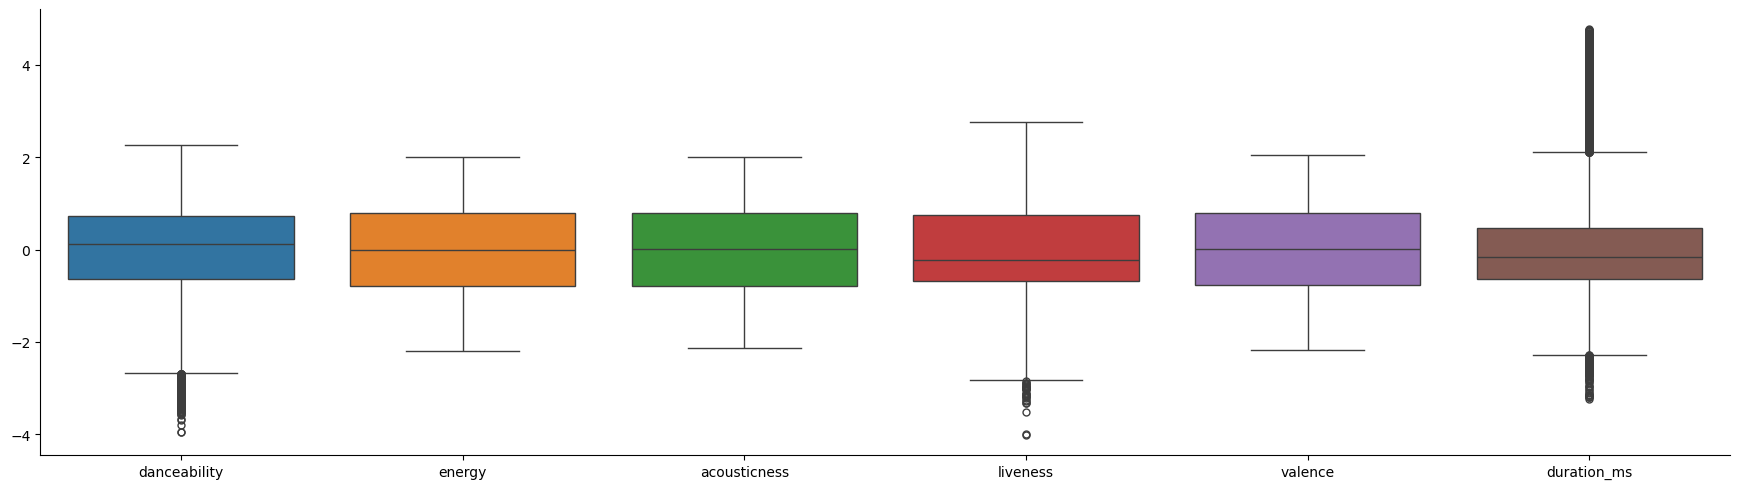

In [15]:
sns.catplot(data = pd.DataFrame(X_songs, columns=df_num.columns), kind='box', aspect=3.5)

plt.show()

THe data appears to be standardized and ready for K-means clustering.

### K-means Cluster

In [16]:
clusters_2 = KMeans(n_clusters=2, random_state= 121, n_init=25, max_iter=500).fit_predict(X_songs)

In [17]:
df_num_copy = df_num.copy()
df_inputs_copy = df_inputs.copy()

In [18]:
df_num_copy['k2'] = pd.Series( clusters_2, index=df_inputs_copy.index).astype('category')

In [19]:
df_num_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28355 entries, 0 to 28354
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   danceability  28355 non-null  float64 
 1   energy        28355 non-null  float64 
 2   acousticness  28355 non-null  float64 
 3   liveness      28355 non-null  float64 
 4   valence       28355 non-null  float64 
 5   duration_ms   28355 non-null  float64 
 6   k2            28355 non-null  category
dtypes: category(1), float64(6)
memory usage: 1.3 MB


In [20]:
df_num_copy.k2.value_counts()

k2
0    16302
1    12053
Name: count, dtype: int64

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


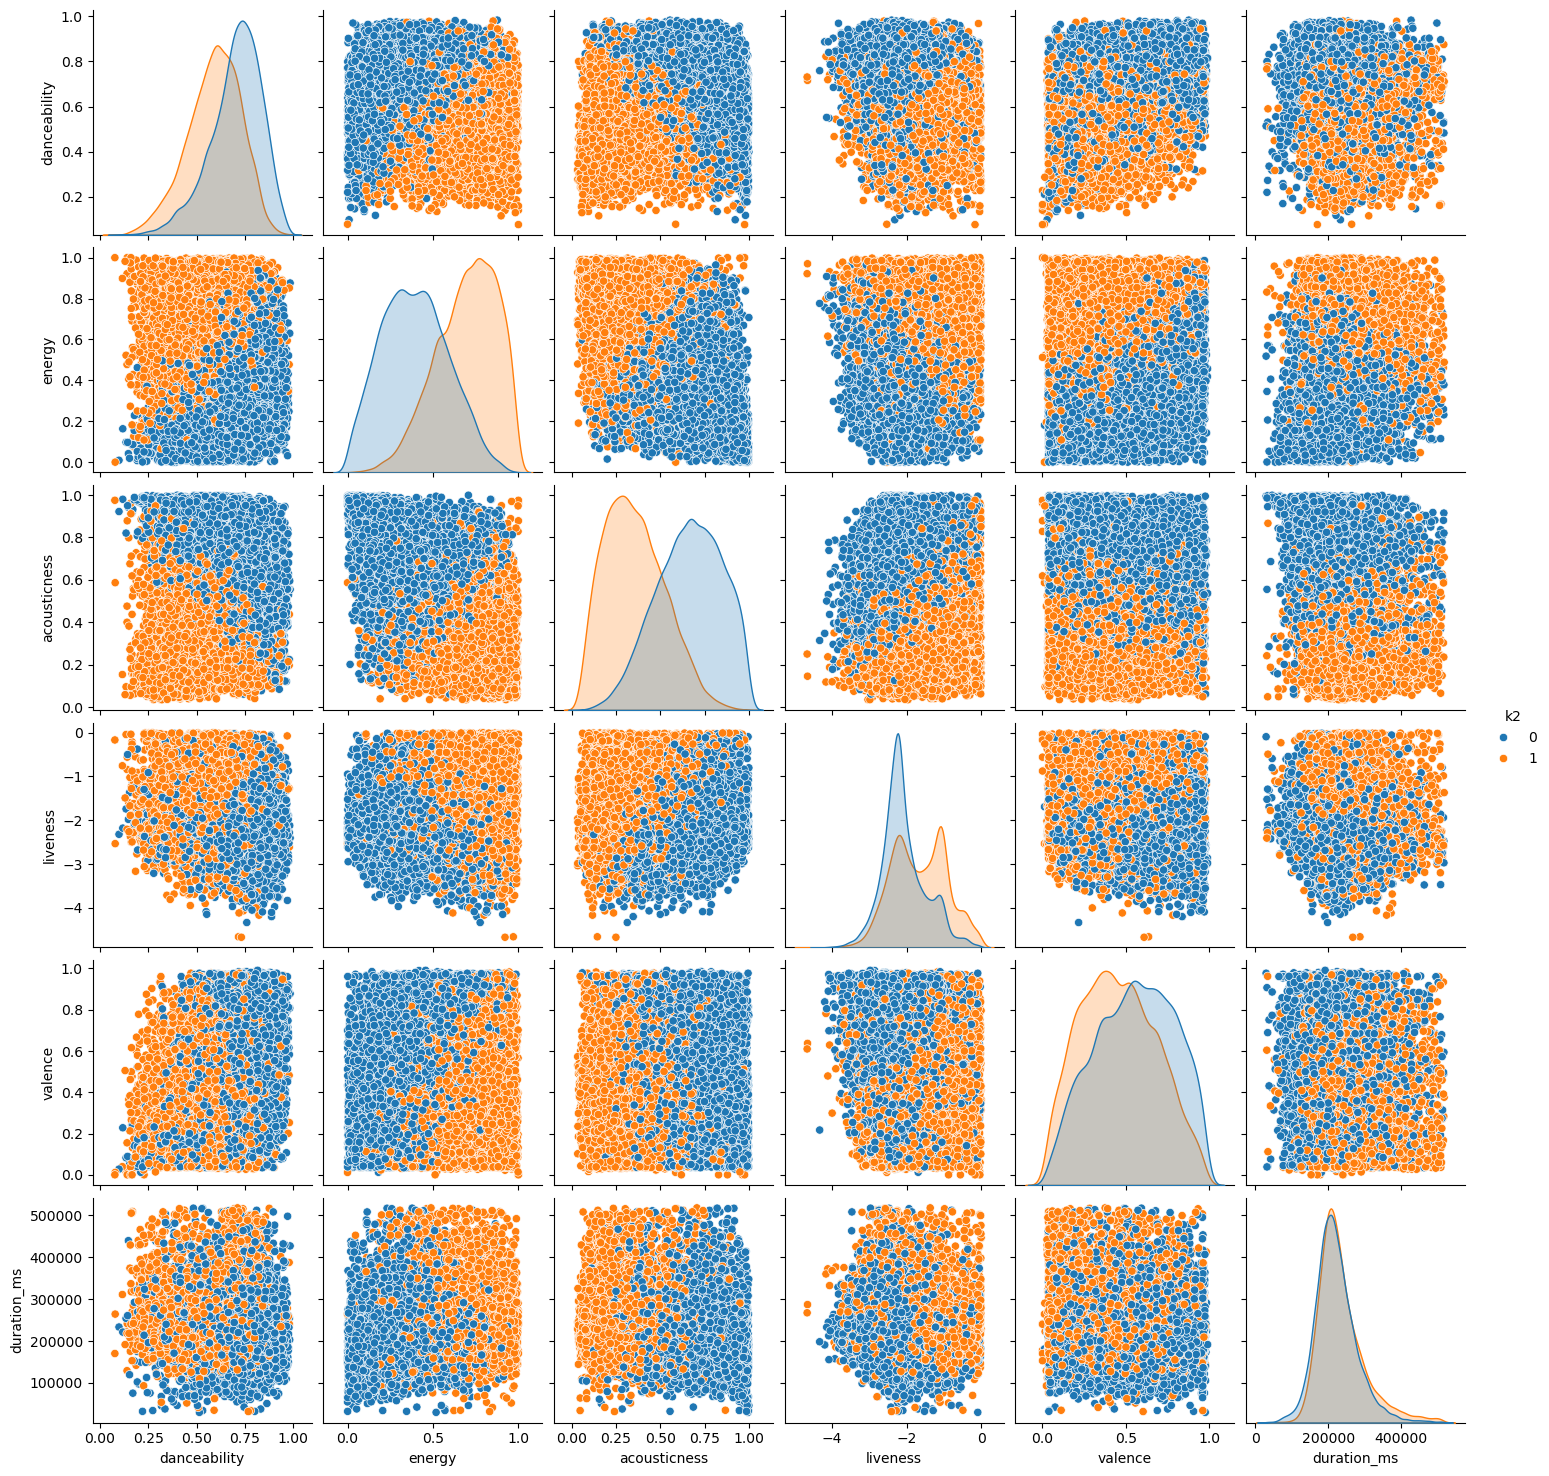

In [21]:
sns.pairplot(data = df_num_copy, hue='k2', diag_kws={'common_norm': False})

plt.show()

Pairsplot shows to many variables so we will execute a PCA. Additionally clusters seem to be balanced in some of the variables such as `energy`, `loudness` and `acousticness`.

### PCA with 2 components

In [22]:
pca_songs = PCA(n_components=2).fit_transform(X_songs)

In [23]:
pca_songs_df = pd.DataFrame( pca_songs, columns=['pc01', 'pc02']) 

In [24]:
pca_songs_df['k2'] = pd.Series( clusters_2, index=df_num_copy.index).astype('category')

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


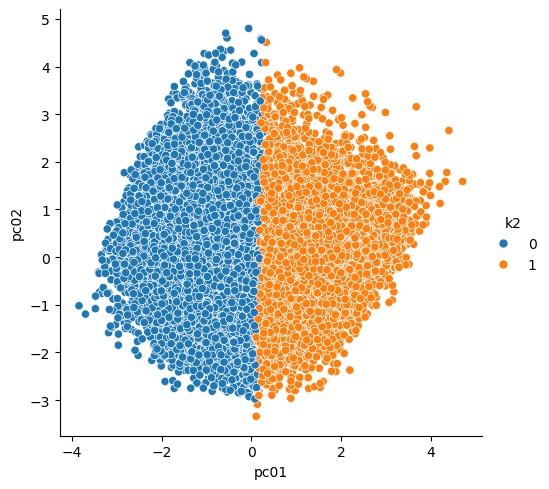

In [25]:
sns.relplot(data = pca_songs_df, x='pc01', y='pc02', hue='k2')

plt.show()

Now let's compare this with the binary classification variable created at the beginning for `popularity_label`.

In [27]:
pca_songs_df['popularity_label'] = df_copy.popularity_label

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


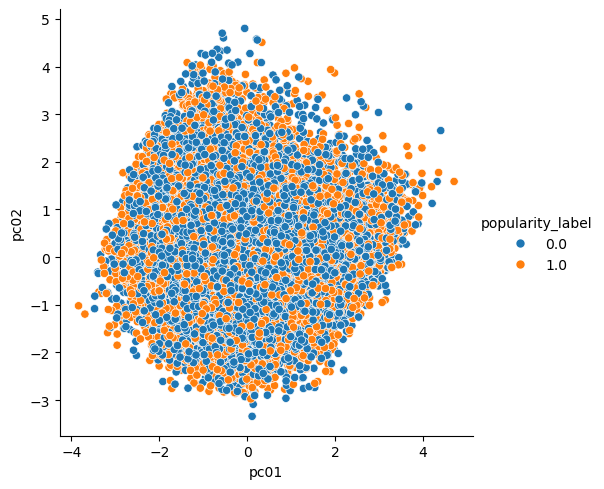

In [28]:
sns.relplot(data = pca_songs_df, x='pc01', y='pc02', hue='popularity_label')

plt.show()

From the plot, we can see that the values are still all over the place, however this is better than when first explored in the EDA. 


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


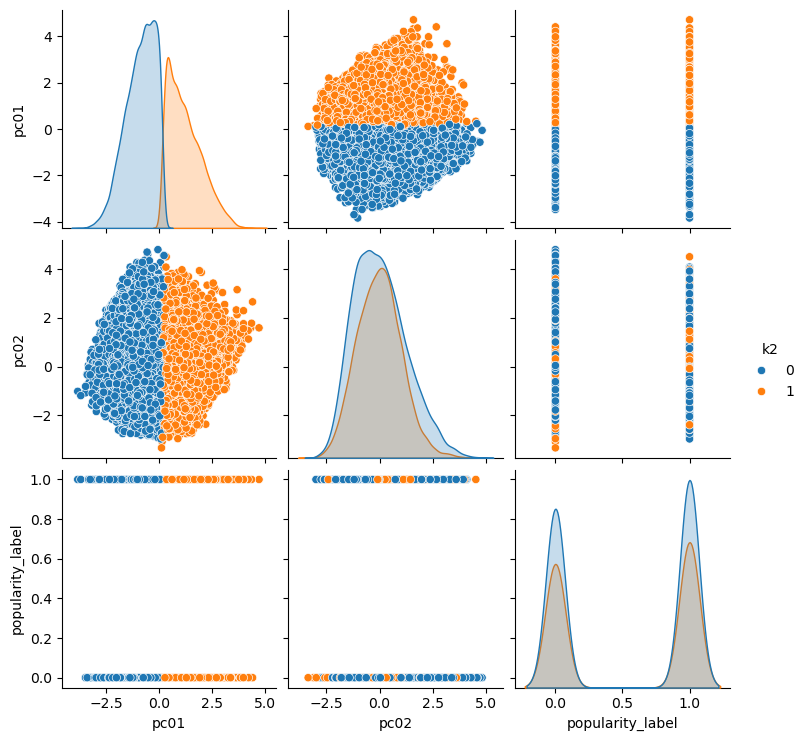

In [29]:
sns.pairplot(data= pca_songs_df, hue='k2')

plt.show()

The pairplot shows the PCA as balanced the values for k2 components. However, when comparing to the popularity label we can see the values are all over the place.

Let's look for the optimal clusters using the Knee bend plot

In [30]:
tots_within = []

K = range(1, 20)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(X_songs)
    tots_within.append(km.inertia_)

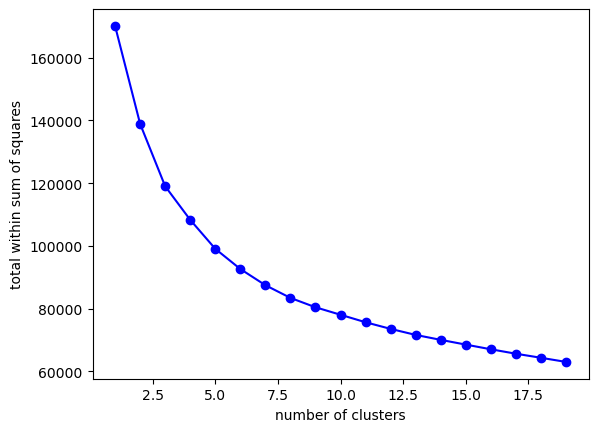

In [31]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show() 

From the plot above we can see 4-7 clusters is a decent value to run KMeans clustering. Let's use KMeans with 5 clusters.

In [32]:
clusters_5 = KMeans(n_clusters=5, random_state= 121, n_init=25, max_iter=500).fit_predict(X_songs)

In [33]:
pca_songs_df['k5'] = pd.Series( clusters_5, index=df_num_copy.index).astype('category')

In [34]:
pca_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28355 entries, 0 to 28354
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pc01              28355 non-null  float64 
 1   pc02              28355 non-null  float64 
 2   k2                28355 non-null  category
 3   popularity_label  28354 non-null  float64 
 4   k5                28355 non-null  category
dtypes: category(2), float64(3)
memory usage: 720.3 KB


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


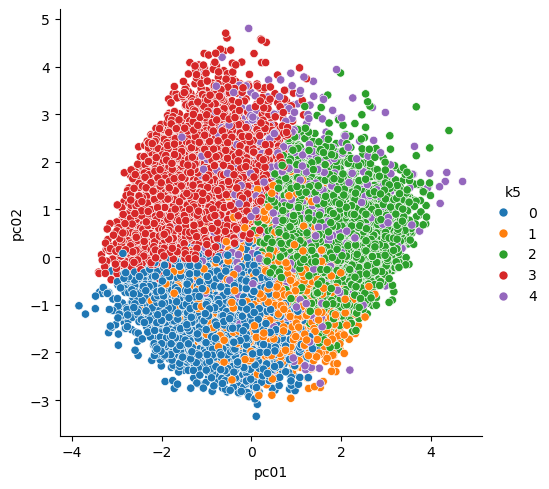

In [35]:
sns.relplot(data = pca_songs_df, x='pc01', y='pc02', hue='k5')

plt.show()

In [36]:
df_num_copy['popularity_label'] = df_copy.popularity_label
df_num_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28355 entries, 0 to 28354
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      28355 non-null  float64 
 1   energy            28355 non-null  float64 
 2   acousticness      28355 non-null  float64 
 3   liveness          28355 non-null  float64 
 4   valence           28355 non-null  float64 
 5   duration_ms       28355 non-null  float64 
 6   k2                28355 non-null  category
 7   popularity_label  28354 non-null  float64 
dtypes: category(1), float64(7)
memory usage: 1.5 MB


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


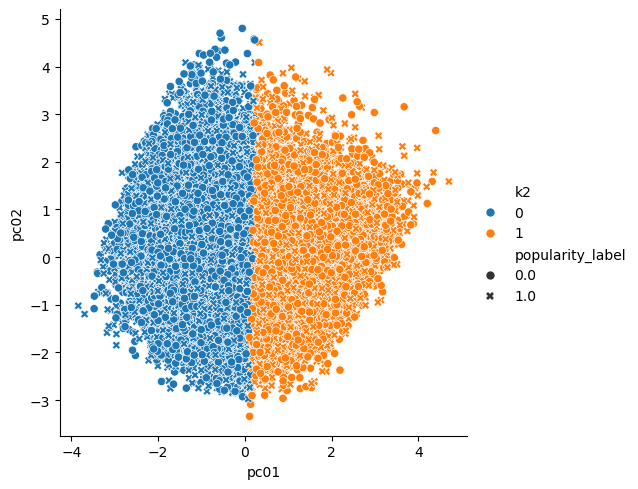

In [37]:
sns.relplot(data = pca_songs_df, x='pc01', y='pc02', hue='k2', style='popularity_label')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


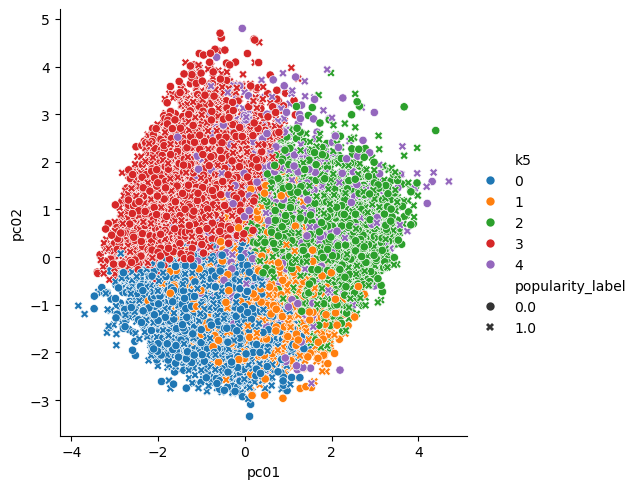

In [38]:
sns.relplot(data = pca_songs_df, x='pc01', y='pc02', hue='k5', style='popularity_label')

plt.show()

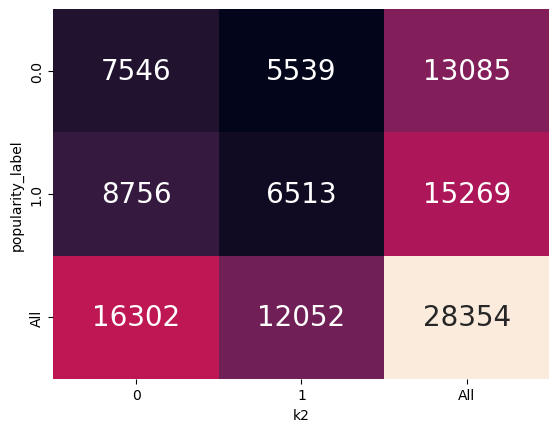

In [39]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_num_copy.popularity_label, df_num_copy.k2, margins=True ), 
            annot=True, annot_kws={"fontsize": 20}, fmt='g',
            cbar=False,
            ax=ax)

plt.show()

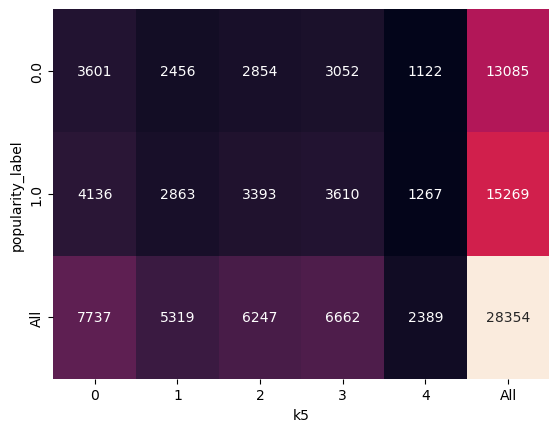

In [40]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( pca_songs_df.popularity_label, pca_songs_df.k5, margins=True ), 
            annot=True, annot_kws={"fontsize": 10}, fmt='g',
            cbar=False,
            ax=ax)

plt.show()

## Interpret section

Comparing the popularity label with the k2 kmeans clustering, we can see there were a couple hundred more songs put into the 0 label, or the less popular label, and a couple hundred less songs put into the 1 label, or the more popular label. This means we could classify the songs into smaller groups, such as 5 groups. Now let's try Hierarchal clustering.


In [41]:
from scipy.cluster import hierarchy 

In [42]:
hclust_complete = hierarchy.complete(X_songs)

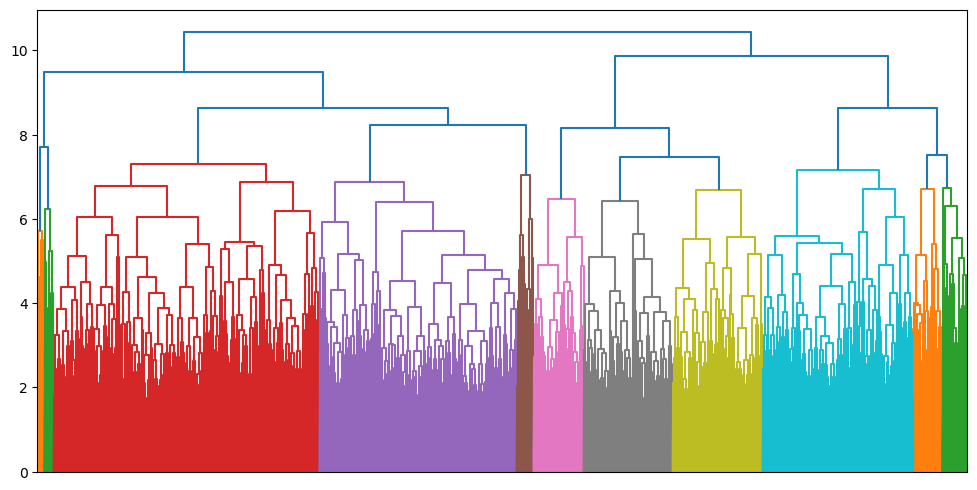

In [43]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram(hclust_complete, no_labels=True )

plt.show()

In [44]:
hclust_average = hierarchy.average( X_songs)

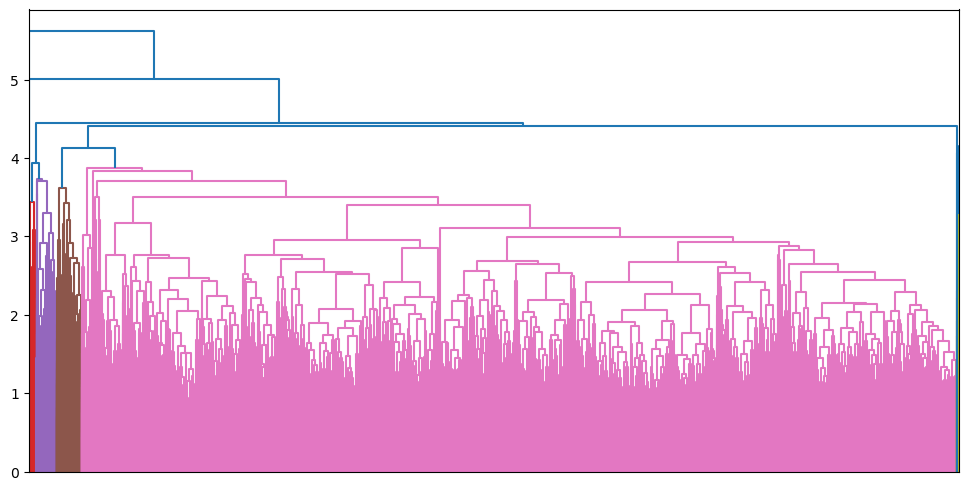

In [45]:
fig = plt.figure(figsize=(12,6))

dn = hierarchy.dendrogram( hclust_average, no_labels=True )

plt.show()

In [46]:
hclust_centroid = hierarchy.centroid( X_songs )

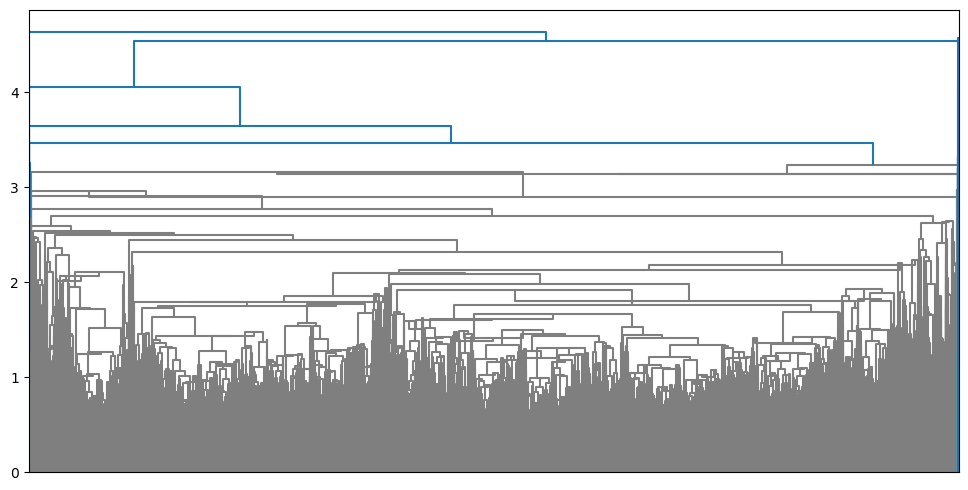

In [47]:
fig = plt.figure(figsize=(12,6))

dn = hierarchy.dendrogram( hclust_centroid, no_labels=True )

plt.show()

In [48]:
hclust_ward = hierarchy.ward( X_songs )

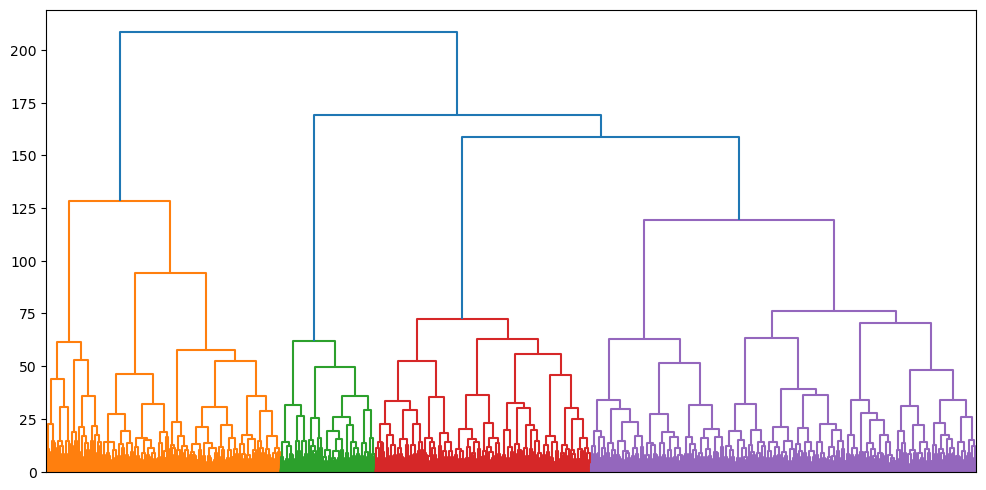

In [49]:
fig = plt.figure(figsize=(12,6))

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

It seems ward clustering produced the best results so we will cut that tree. Let's explore clusters at 2 (known categories) and 6.

In [50]:
hierarchy.cut_tree( hclust_ward, n_clusters=6).ravel()

array([0, 1, 2, ..., 1, 5, 5])

In [51]:
pca_songs_df['hclust_6'] = pd.Series(hierarchy.cut_tree( hclust_ward, n_clusters=6).ravel(),
                                    index=pca_songs_df.index).astype('category')

In [52]:
pca_songs_df['hclust_2'] = pd.Series(hierarchy.cut_tree( hclust_ward, n_clusters=2).ravel(),
                                    index=pca_songs_df.index).astype('category')

In [53]:
pca_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28355 entries, 0 to 28354
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   pc01              28355 non-null  float64 
 1   pc02              28355 non-null  float64 
 2   k2                28355 non-null  category
 3   popularity_label  28354 non-null  float64 
 4   k5                28355 non-null  category
 5   hclust_6          28355 non-null  category
 6   hclust_2          28355 non-null  category
dtypes: category(4), float64(3)
memory usage: 776.0 KB


In [54]:
pca_songs_df.hclust_2.value_counts()

hclust_2
0    21213
1     7142
Name: count, dtype: int64

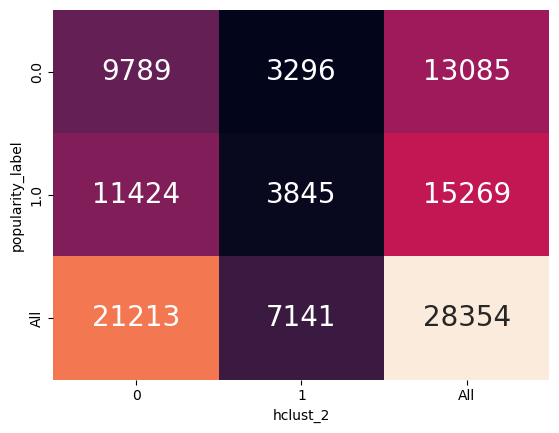

In [55]:
fig, ax = plt.subplots()

sns.heatmap( data = pd.crosstab( pca_songs_df.popularity_label, pca_songs_df.hclust_2, margins=True),
            annot=True, annot_kws={'fontsize':20}, fmt='g',
            cbar=False, ax=ax)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


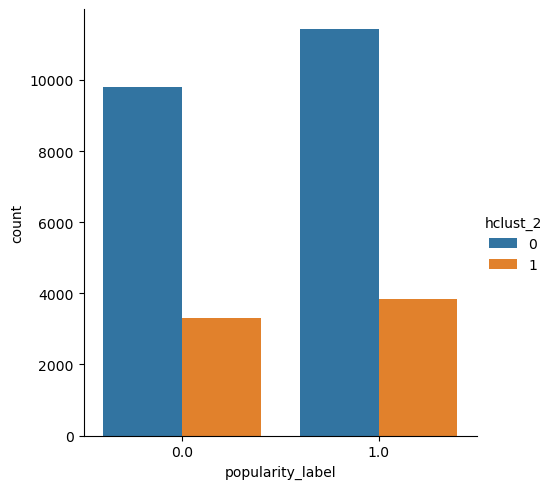

In [56]:
sns.catplot(data = pca_songs_df, x='popularity_label', hue='hclust_2', kind='count')

plt.show()

From the bar chart and heat map, we can see that the values are not correspondent to the orignial categories. A lot more of the 0 cluster values ended up in the high popularity value (1) than the low popularity values (0). The bar chart shows the same.

Let's explore the original transformed features. 

In [57]:
df_num_copy['hclust_2'] =  pca_songs_df.hclust_2

In [58]:
df_num_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28355 entries, 0 to 28354
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      28355 non-null  float64 
 1   energy            28355 non-null  float64 
 2   acousticness      28355 non-null  float64 
 3   liveness          28355 non-null  float64 
 4   valence           28355 non-null  float64 
 5   duration_ms       28355 non-null  float64 
 6   k2                28355 non-null  category
 7   popularity_label  28354 non-null  float64 
 8   hclust_2          28355 non-null  category
dtypes: category(2), float64(7)
memory usage: 1.6 MB


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


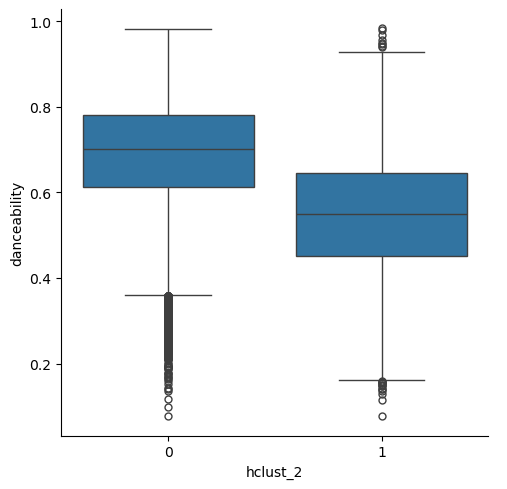

In [59]:
sns.catplot( data = df_num_copy, x='hclust_2', y='danceability', kind='box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


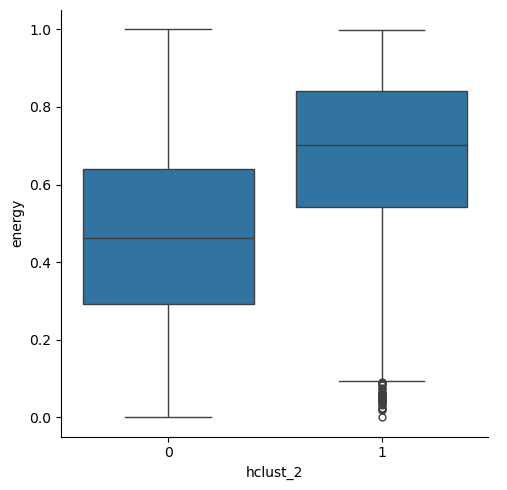

In [60]:
sns.catplot( data = df_num_copy, x='hclust_2', y='energy', kind='box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


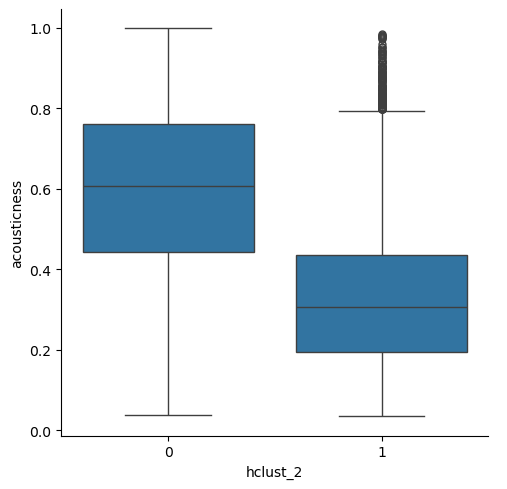

In [61]:
sns.catplot( data = df_num_copy, x='hclust_2', y='acousticness', kind='box')

plt.show()

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32832 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32832 non-null  object 
 1   track_name                32827 non-null  object 
 2   track_artist              32827 non-null  object 
 3   track_popularity          32832 non-null  int64  
 4   track_album_id            32832 non-null  object 
 5   track_album_name          32827 non-null  object 
 6   track_album_release_date  32832 non-null  object 
 7   playlist_name             32832 non-null  object 
 8   playlist_id               32832 non-null  object 
 9   playlist_genre            32832 non-null  object 
 10  playlist_subgenre         32832 non-null  object 
 11  danceability              32832 non-null  float64
 12  energy                    32832 non-null  float64
 13  key                       32832 non-null  int64  
 14  loudness   

In [63]:
df_inputs_copy['hclust_2'] =  pca_songs_df.hclust_2
df_inputs_copy['hclust_6'] =  pca_songs_df.hclust_6

In [64]:
lf_2 = df_inputs_copy.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'key', 'mode', 'playlist_genre', 'hclust_2'],
         value_vars=df_inputs_copy.columns)

In [65]:
lf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226840 entries, 0 to 226839
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   rowid           226840 non-null  int64   
 1   key             226840 non-null  category
 2   mode            226840 non-null  category
 3   playlist_genre  226840 non-null  object  
 4   hclust_2        226840 non-null  category
 5   variable        226840 non-null  object  
 6   value           226840 non-null  object  
dtypes: category(3), int64(1), object(3)
memory usage: 7.6+ MB


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


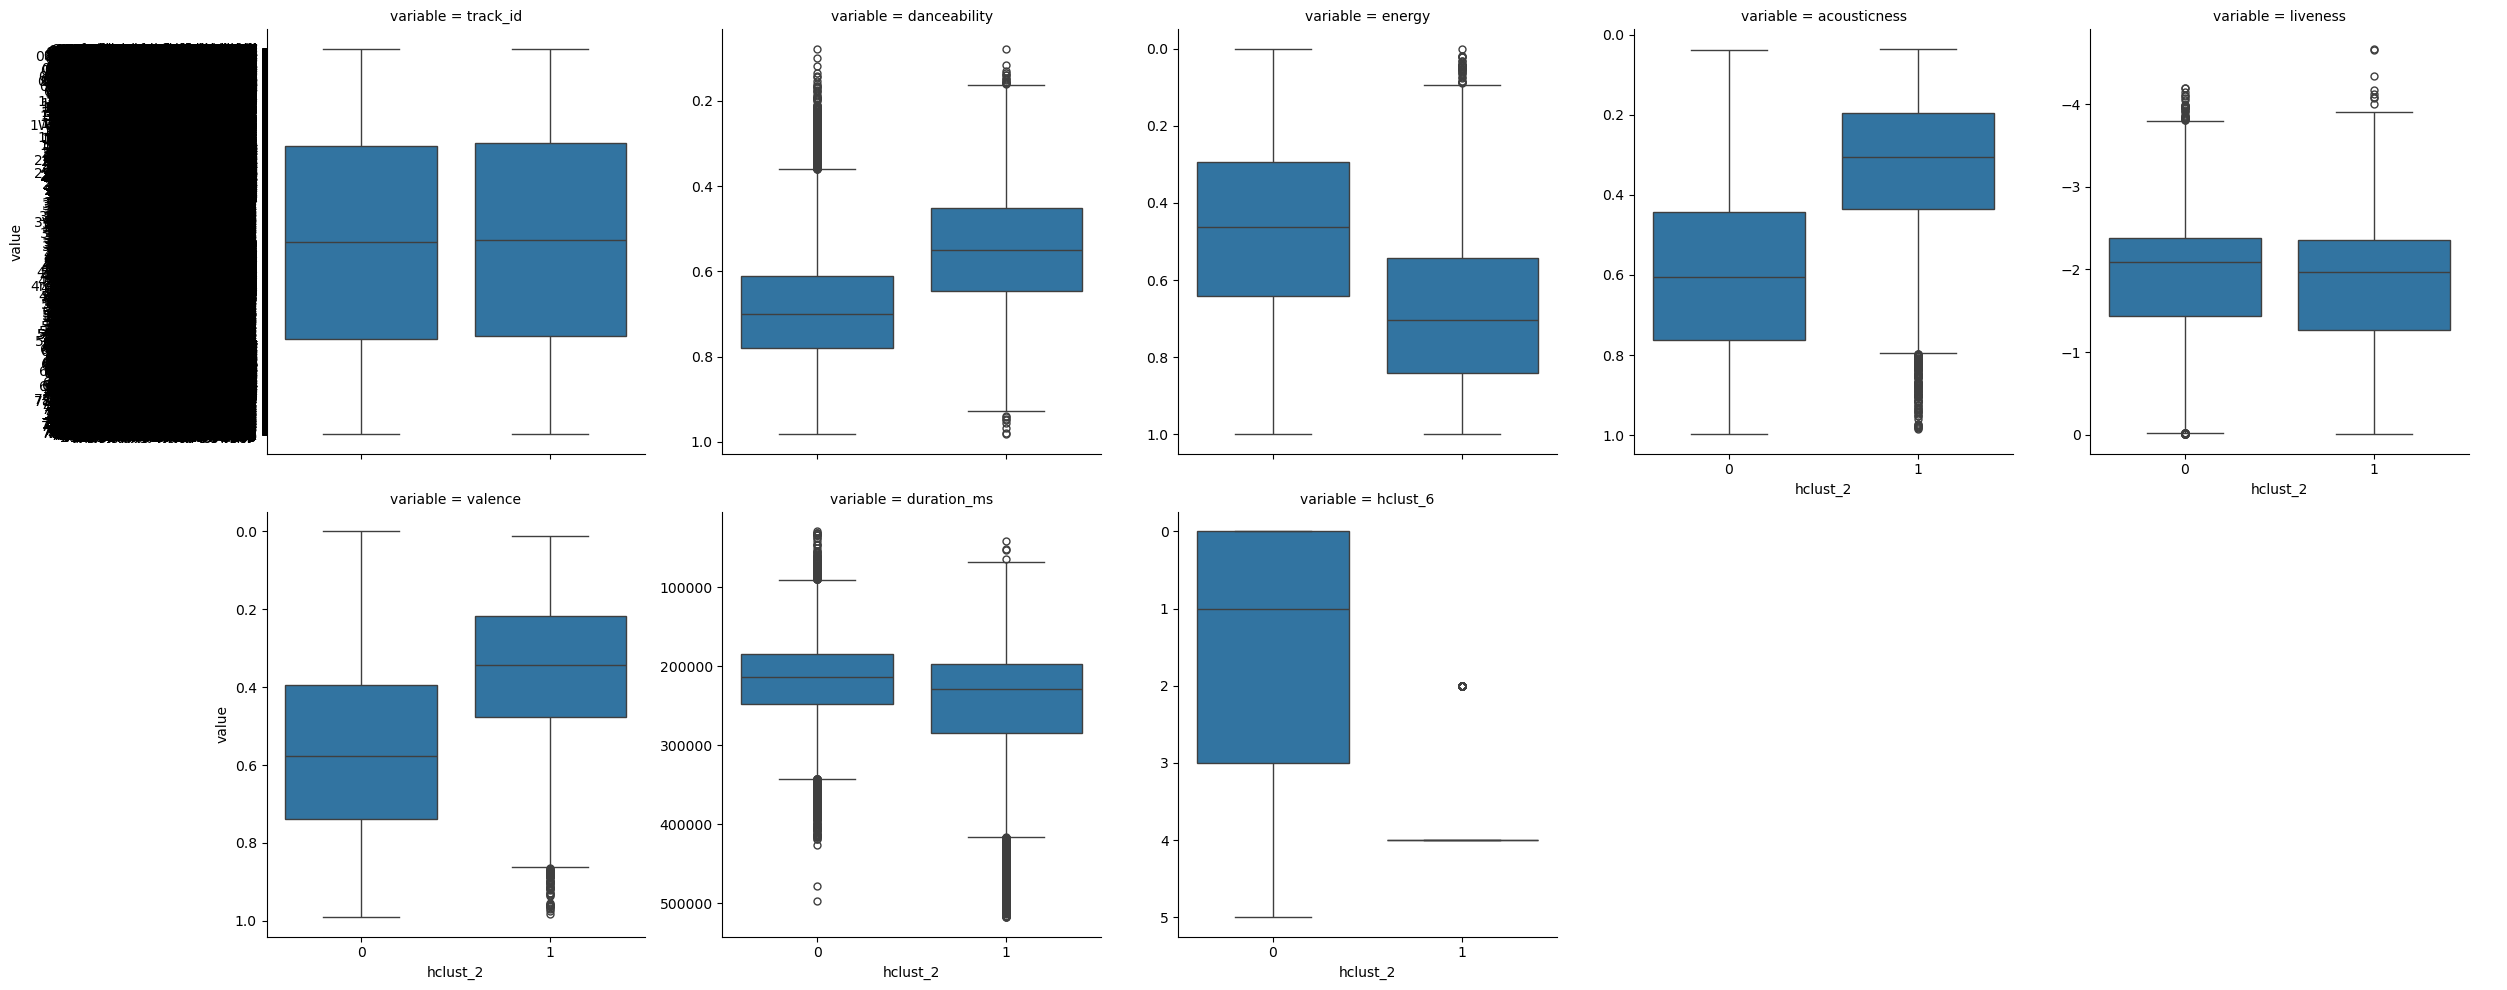

In [66]:
sns.catplot( data = lf_2, x='hclust_2', y='value', col='variable', col_wrap=5, 
            kind='box',
            sharey=False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


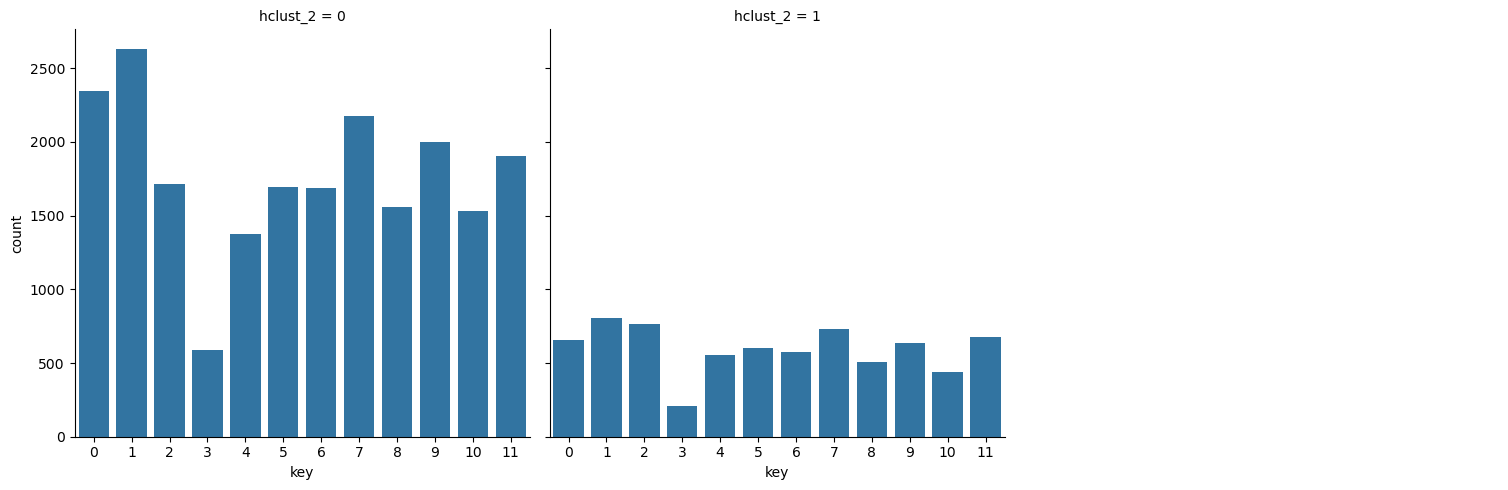

In [67]:
sns.catplot( data = df_inputs_copy, x='key', col='hclust_2',
             col_wrap=3, kind='count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


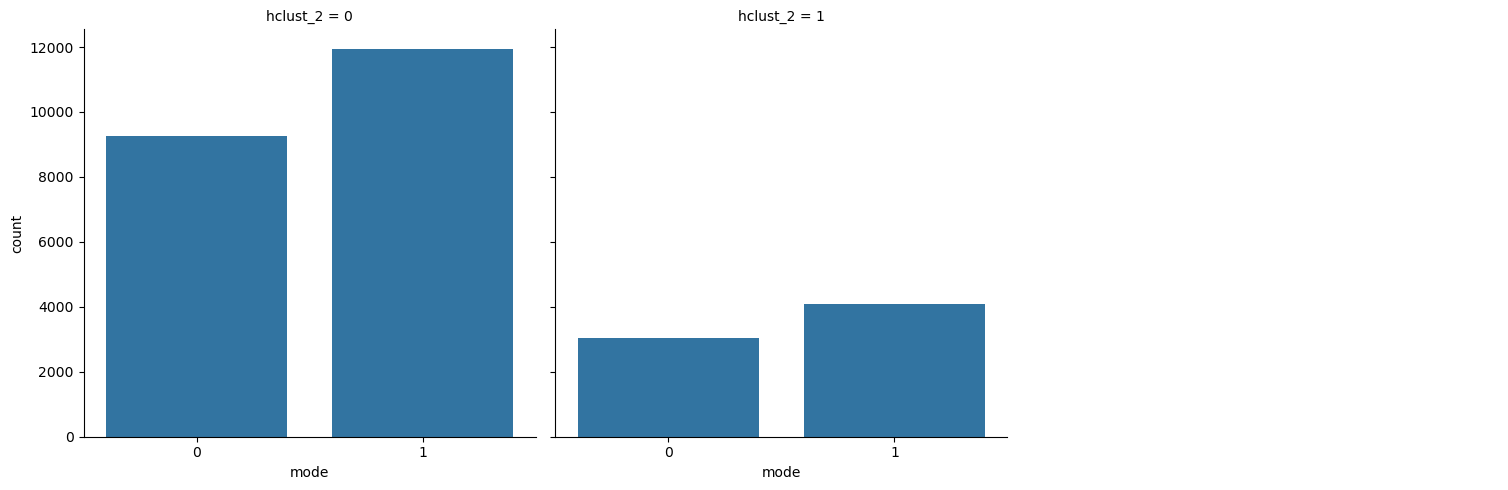

In [68]:
sns.catplot( data = df_inputs_copy, x='mode', col='hclust_2',
             col_wrap=3, kind='count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


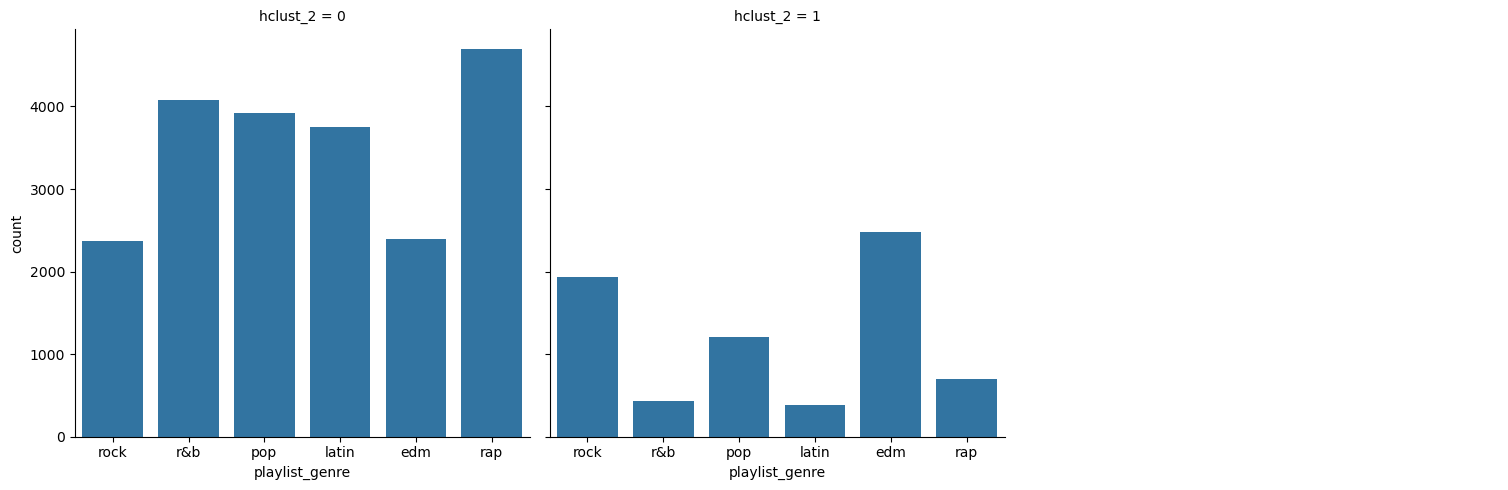

In [69]:
sns.catplot( data = df_inputs_copy, x='playlist_genre', col='hclust_2',
             col_wrap=3, kind='count')

plt.show()

Comparing the clustering groups with the categorical values, we can see there are many more values clusterd into the 0 group than the 1 group. However, they seem to share a similar bin distribution among the categorical values in the `key`, `mode` and `playlist_genre`.

Let's take a look at the hclust_6 values.

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


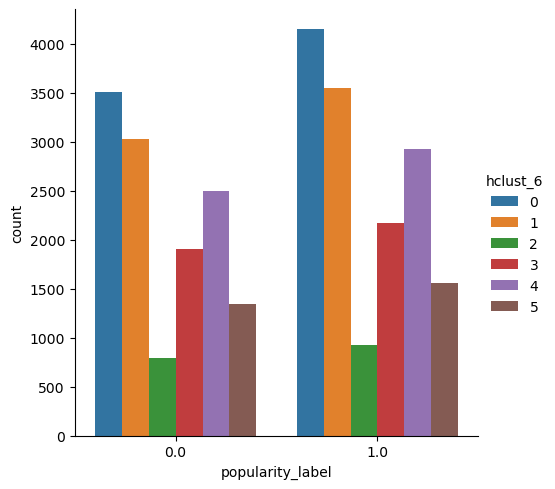

In [70]:
sns.catplot(data = pca_songs_df, x='popularity_label', hue='hclust_6', kind='count')

plt.show()

Both 0 and 1 popularity labels show similar distribution trends, with the 0 cluster being much larger than the rest of the groups in both values.

In [71]:
pca_songs_df.hclust_6.value_counts()

hclust_6
0    7663
1    6579
4    5427
3    4073
5    2898
2    1715
Name: count, dtype: int64

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


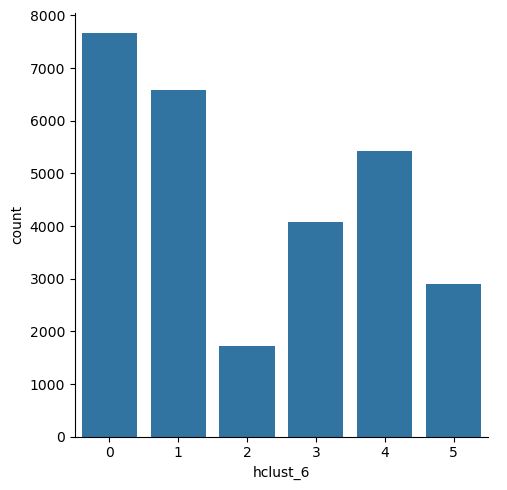

In [72]:
sns.catplot( data = pca_songs_df, x='hclust_6', kind='count')

plt.show()

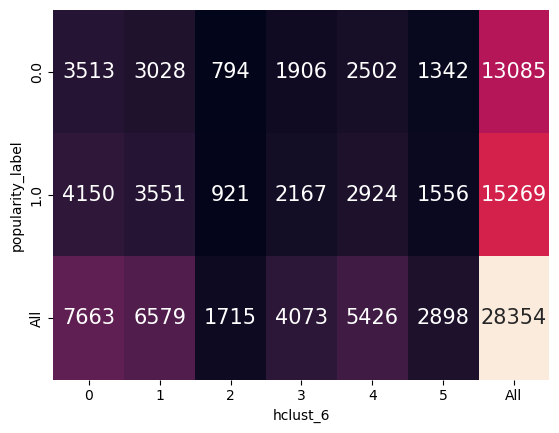

In [73]:
fig, ax = plt.subplots()

sns.heatmap( data = pd.crosstab( pca_songs_df.popularity_label, pca_songs_df.hclust_6, margins=True),
            annot=True, annot_kws={'fontsize':15}, fmt='g',
            cbar=False, ax=ax)

plt.show()

In [74]:
lf_6 = df_inputs_copy.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'key', 'mode', 'playlist_genre', 'hclust_6'],
         value_vars=df_inputs_copy.columns)

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


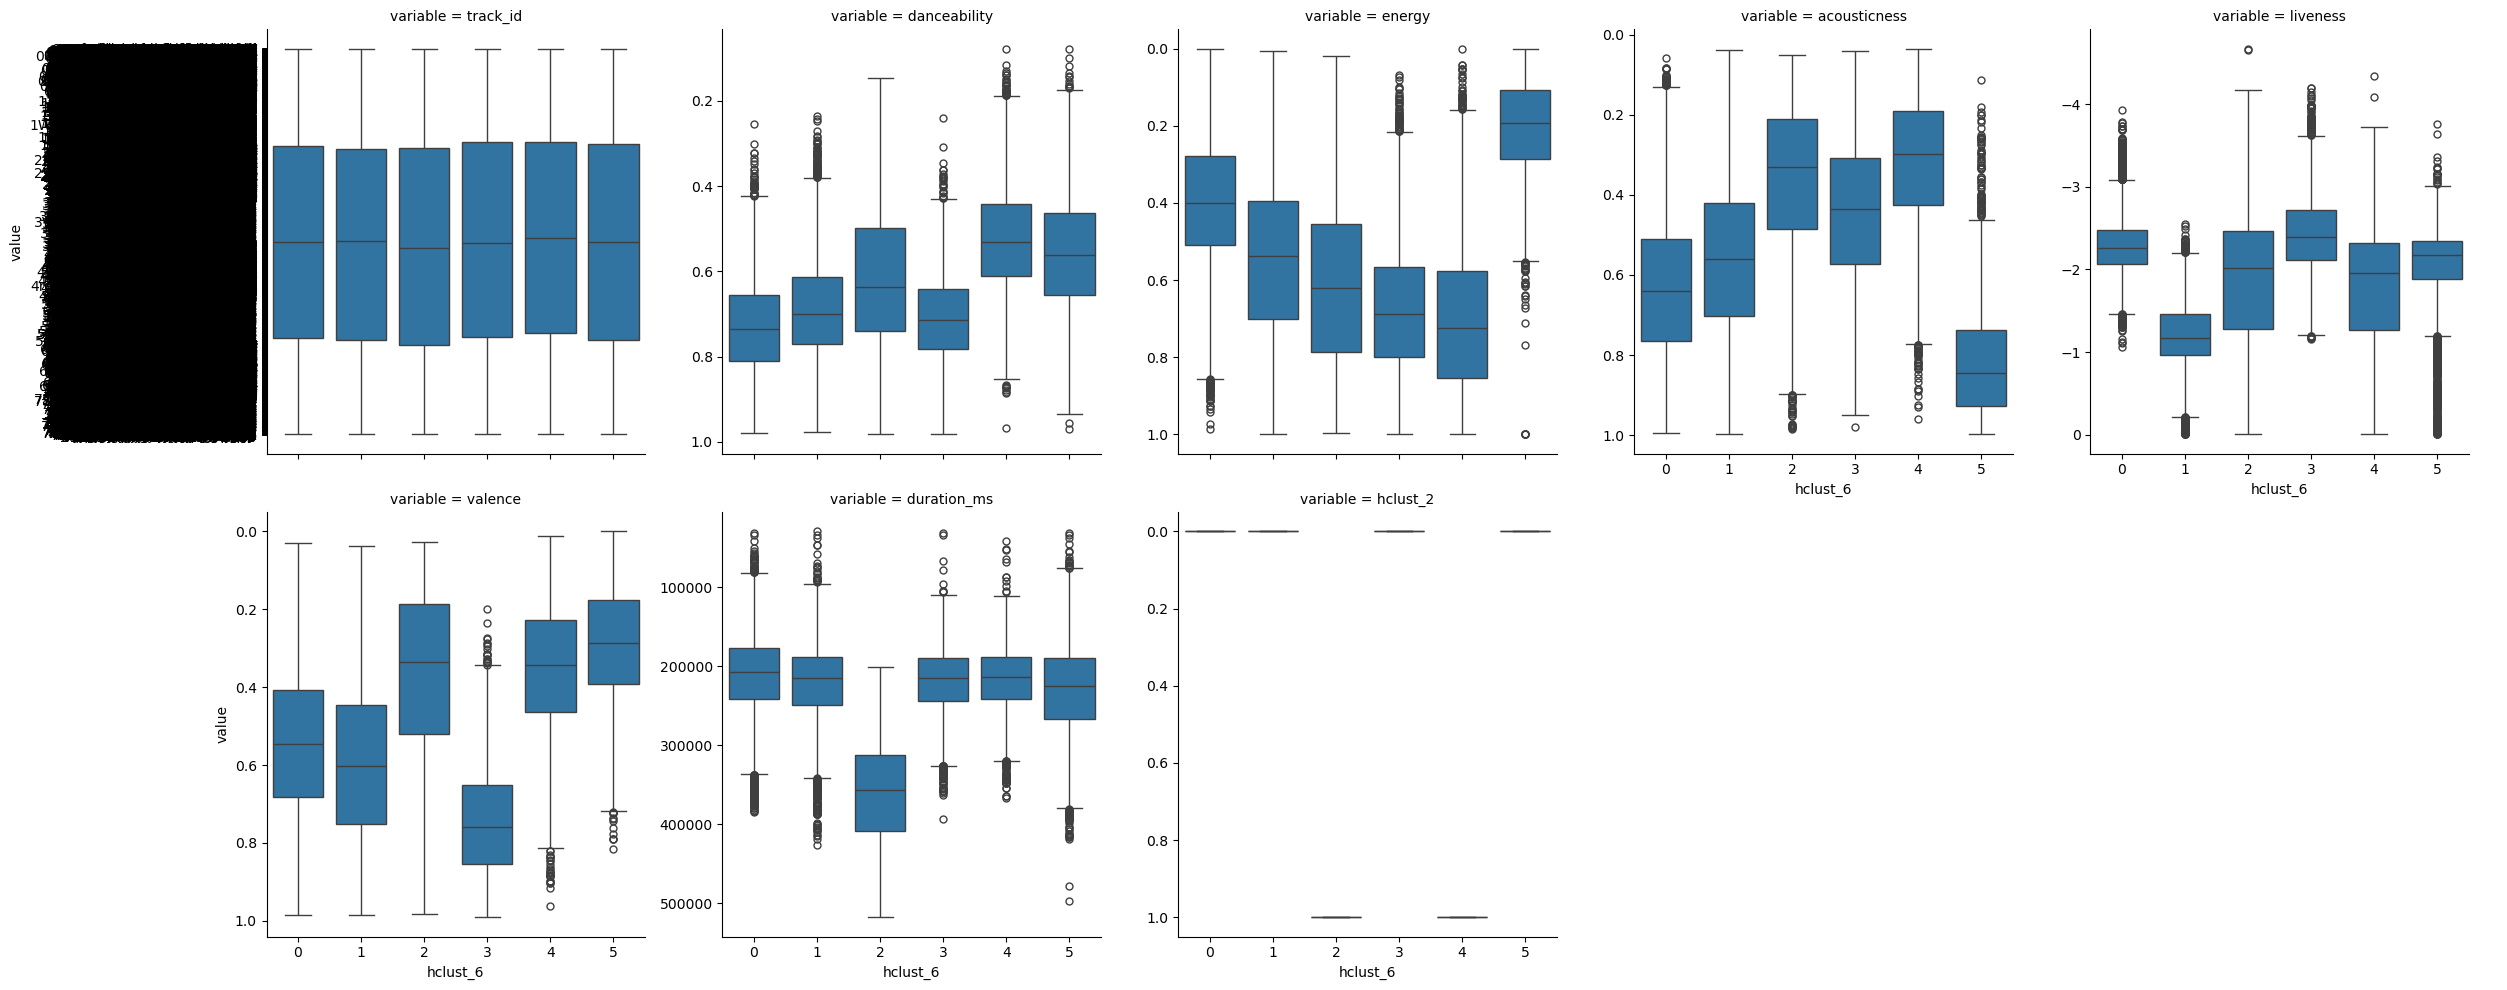

In [75]:
sns.catplot( data = lf_6, x='hclust_6', y='value', col='variable', col_wrap=5, 
            kind='box',
            sharey=False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


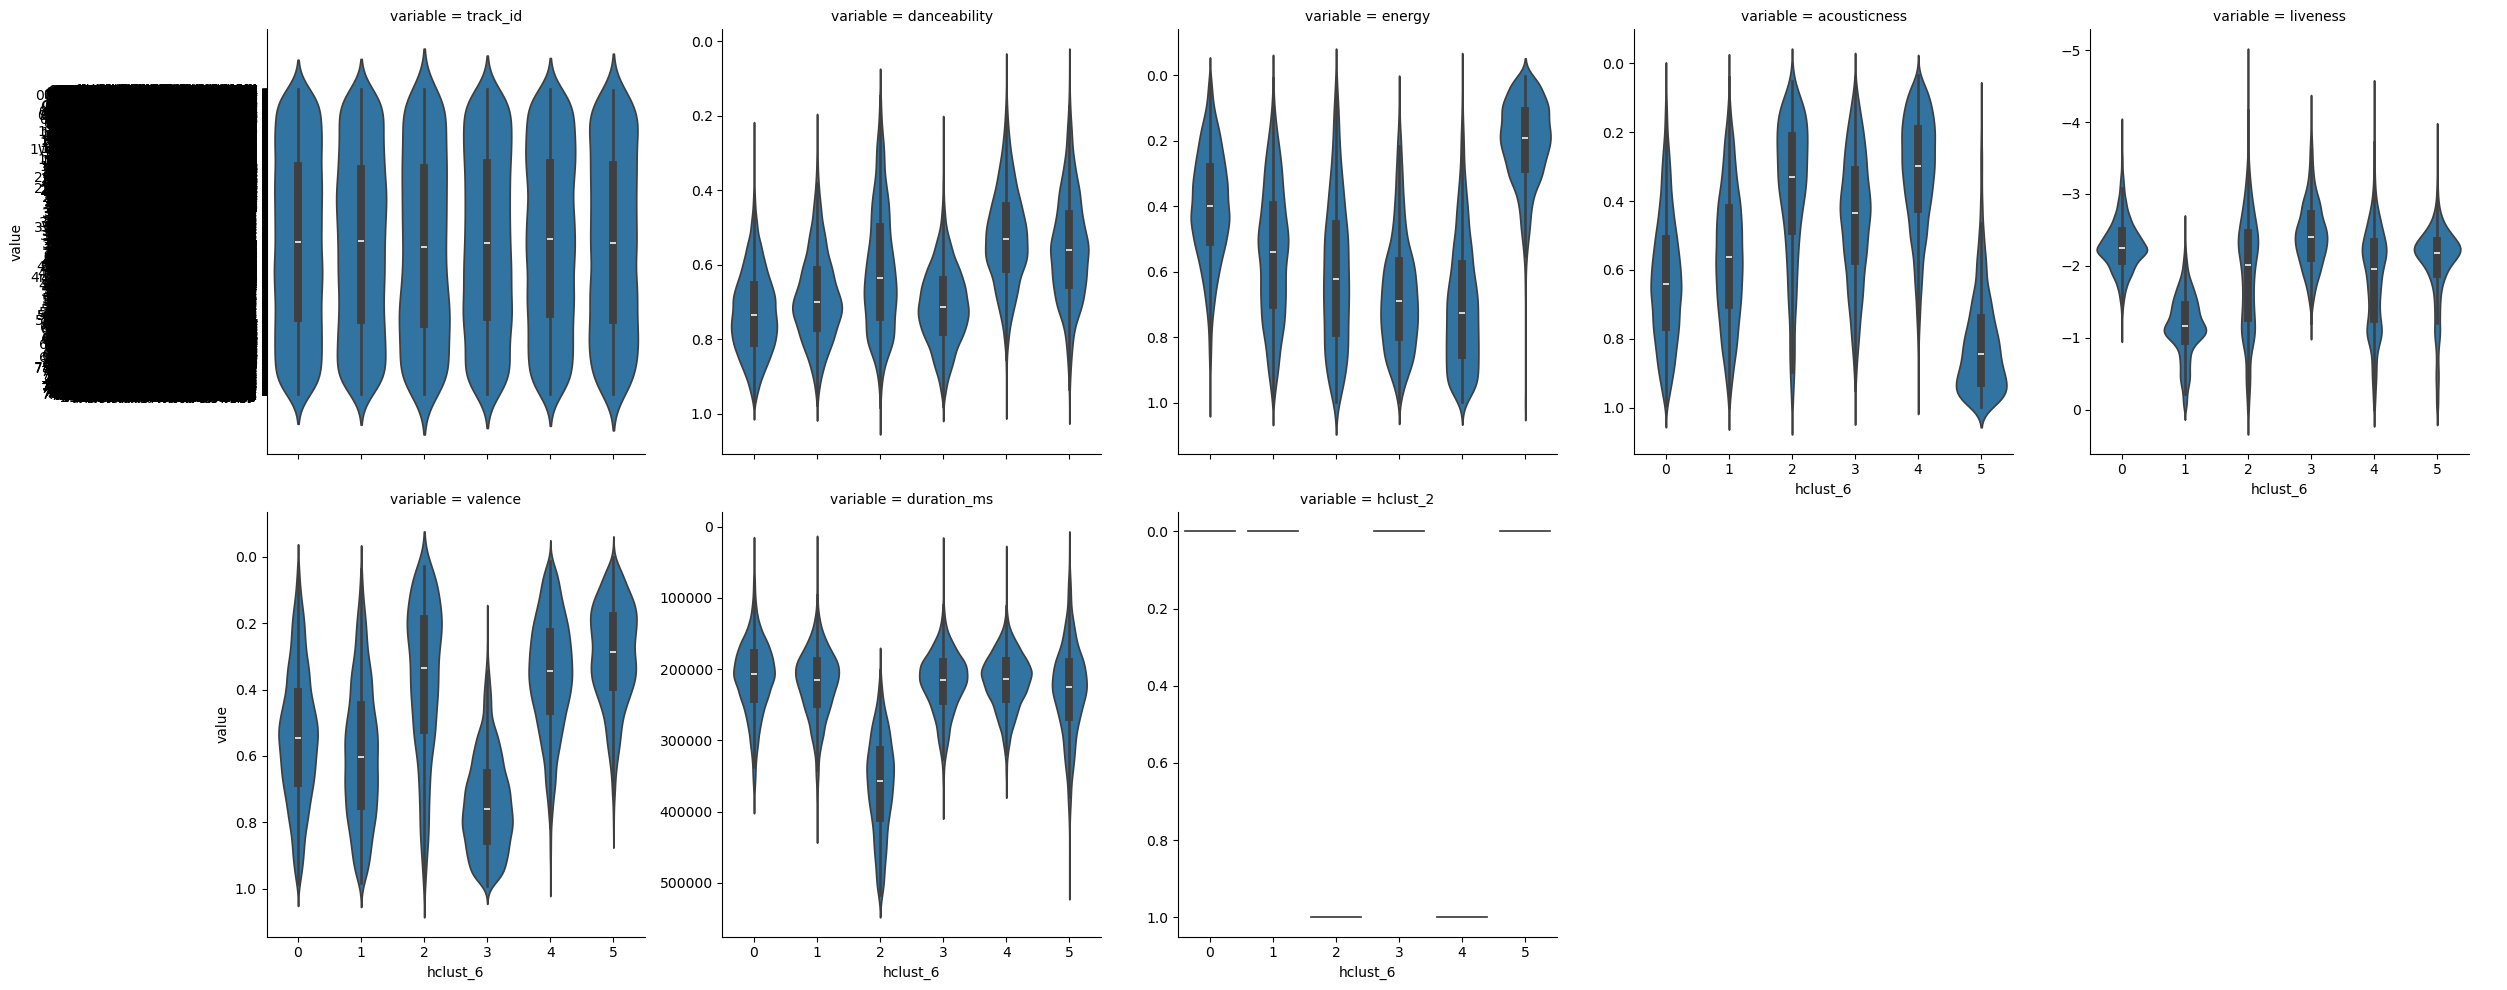

In [76]:
sns.catplot( data = lf_6, x='hclust_6', y='value', col='variable', col_wrap=5, 
            kind='violin',
            sharey=False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


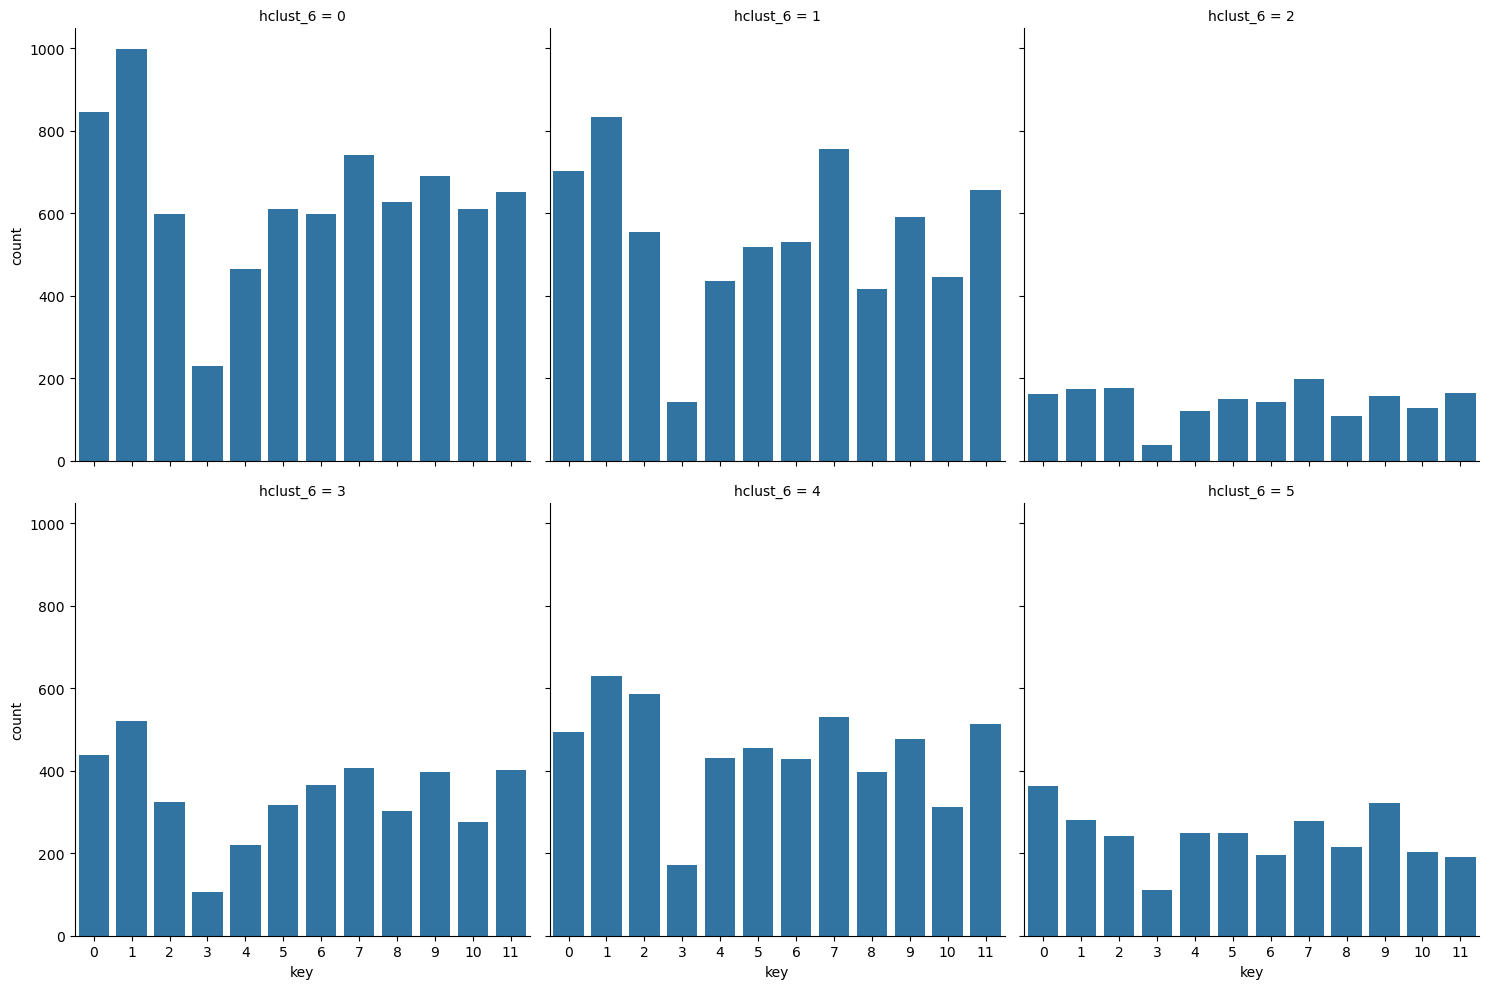

In [77]:
sns.catplot( data = df_inputs_copy, x='key', col='hclust_6',
             col_wrap=3, kind='count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


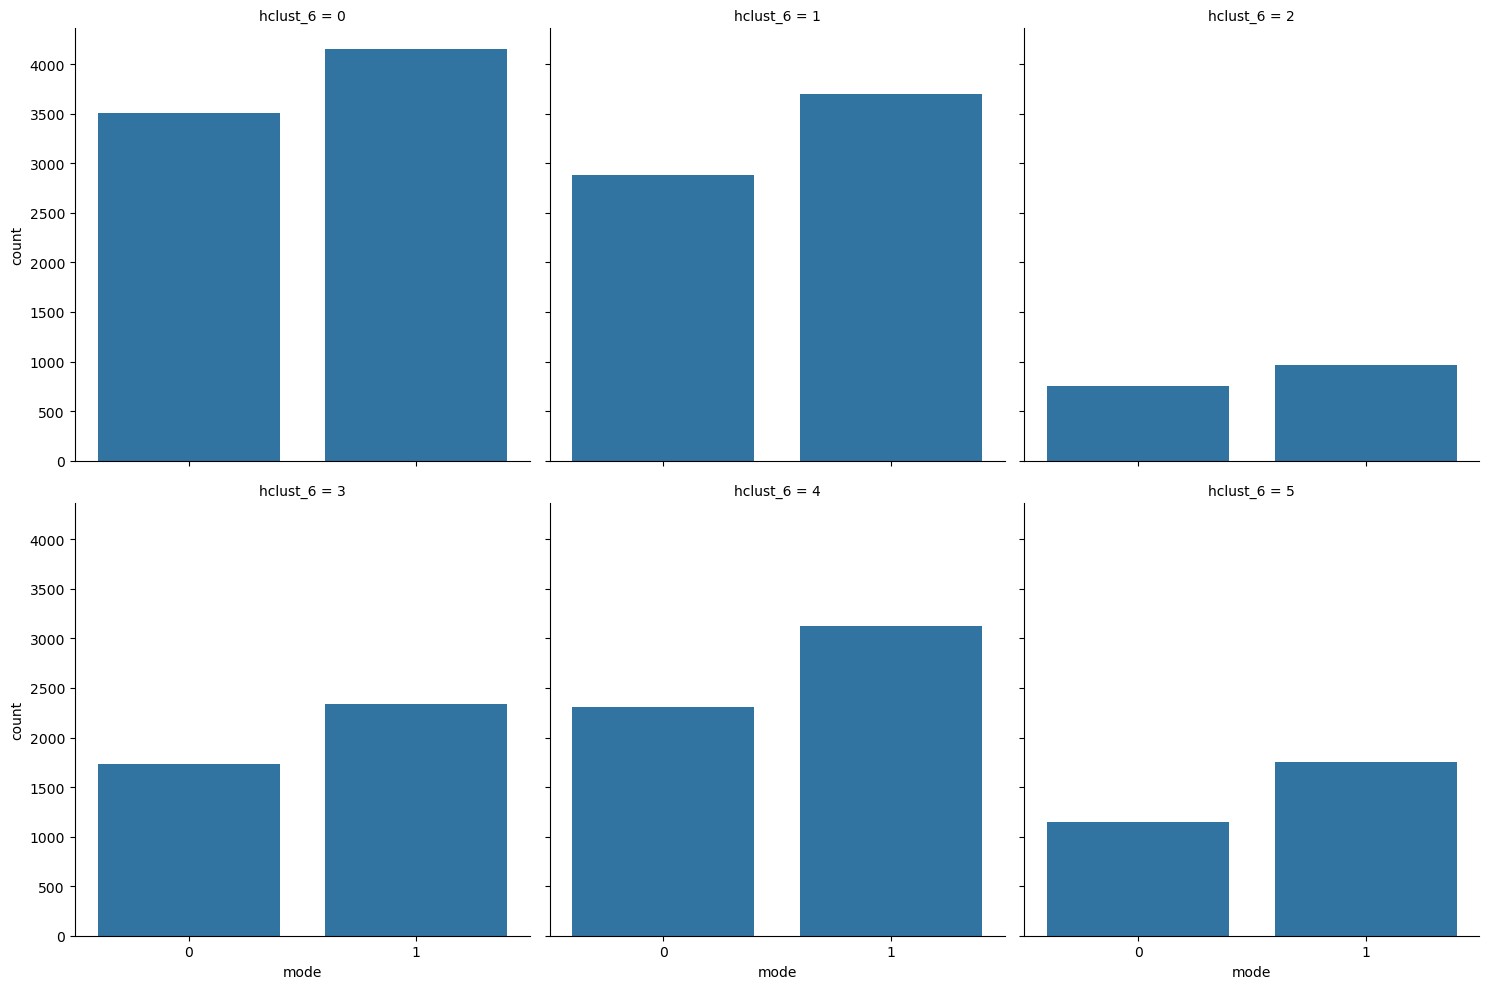

In [78]:
sns.catplot( data = df_inputs_copy, x='mode', col='hclust_6',
             col_wrap=3, kind='count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


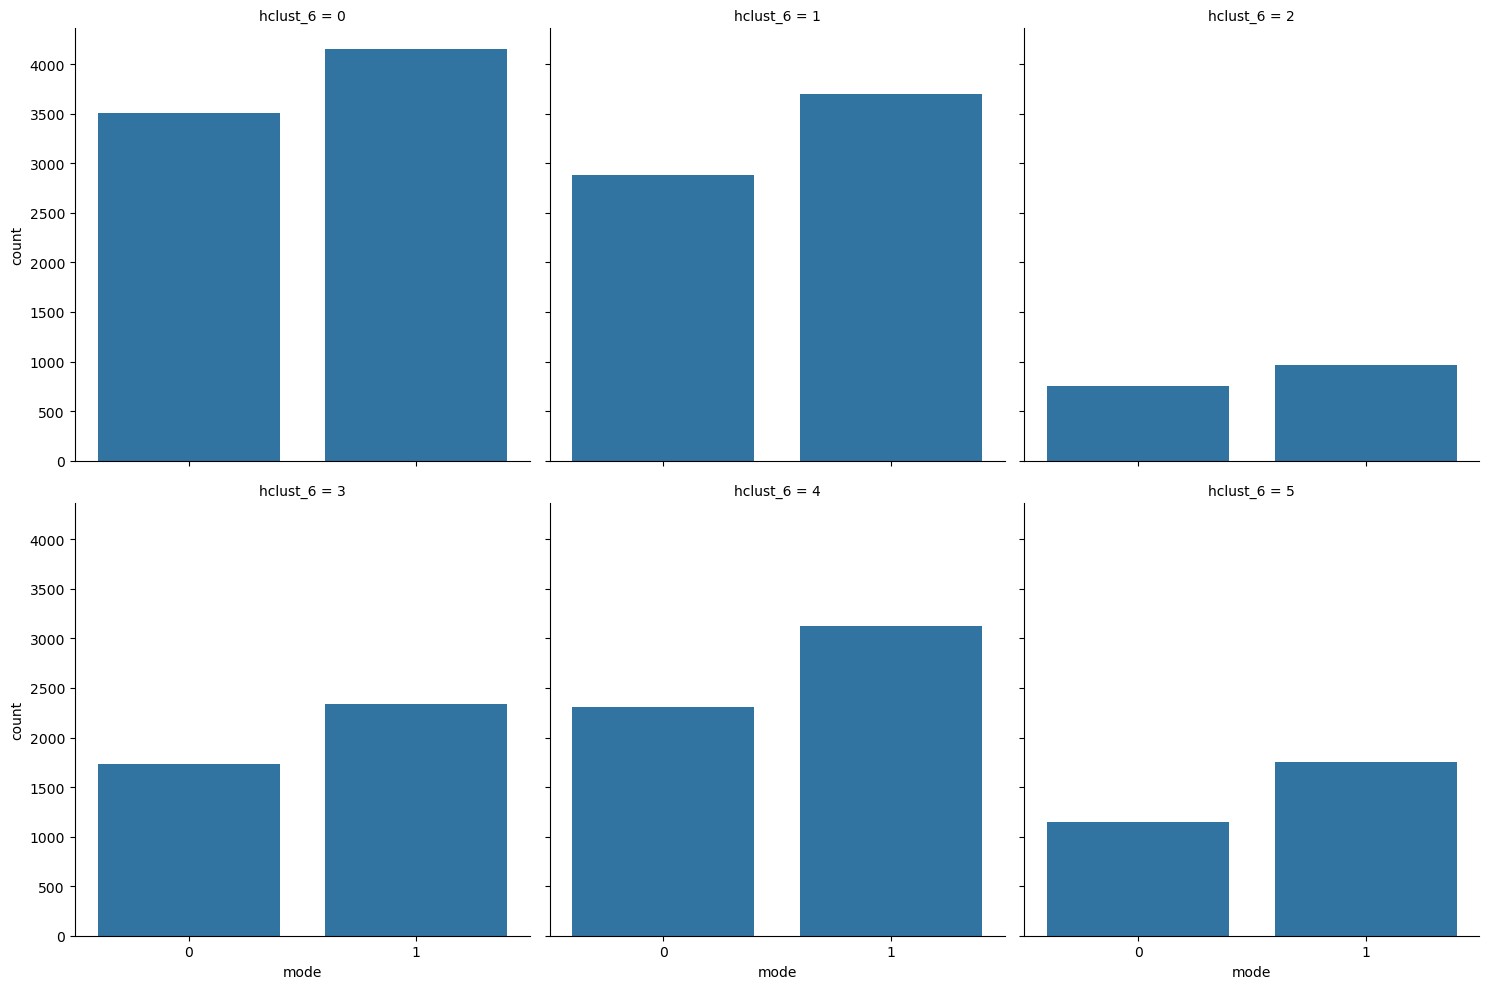

In [79]:
sns.catplot( data = df_inputs_copy, x='mode', col='hclust_6',
             col_wrap=3, kind='count')

plt.show()

Comparing the clustering groups with the categorical values, we can see there are many more values clusterd into the 0 group than the 1 group. However, they seem to share a similar bin distribution among the categorical values in the `key`, `mode` and `playlist_genre`. 

Comparing the hierarchal clustering values to the numerical inputs, we can see some variables e.g `danceability` have a wide distribution across its values while other such as `tempo` have more values centered around the mean.